# How to Quickly Generate a Wordcloud in Python

I'm working on a machine learning project that will model auction prices for paintings. Based on some domain knowledge, I have the sense that keywords included in the artwork title and medium features will be useful in predicting price outcomes. My eventual plan is to use `sklearn.feature_extraction.text.TfidfVectorizer` to create features from the words in each of these fields, but before doing that I thought it would be useful to get a better sense of what the most frequently-occurring words even were. Hence, a wordcloud. Turns out it's super easy to generate these using the [wordcloud](https://github.com/amueller/word_cloud) module.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud
import cpi
import seaborn as sns

In [2]:
df = pd.read_csv('../../art_auction/data/auction_data_cleaned.csv', index_col=0)
df.head()

,artist_name,title,date,medium,dims,auction_date,auction_house,auction_sale,auction_lot,price_realized,...,auction_year,price_realized_USD_constant_2022,area_cm_sq,volume_cm_cu,living,years_after_death_of_auction,artist_age_at_auction,artist_age_at_artwork_completion,artwork_age_at_auction,years_ago_of_auction
0,Pablo Picasso,Fillette au bateau (Maya),1938,oil on canvas,73.3 x 60 cm,"Mar 1, 2023",Sotheby's• London,Modern & Contemporary Evening Auction,Lot6002,NaN,...,2023,NaN,4398.00,NaN,0,50.0,NaN,57.0,85.0,0
1,Pablo Picasso,Homme assis,1969,oil on panel laid down on cradled panel,28.7 x 56.6 cm,"Nov 30, 2022",Christie's,Live Auction 19901 20th/21st Century Art Eveni...,Lot35,"HK\$10,650,000• US\$1,363,489",...,2022,1363489.0,1624.42,NaN,0,49.0,NaN,88.0,53.0,1
2,Pablo Picasso,Buffalo Bill,1911,oil and sand on canvas,33.3 x 46.3 cm,"Nov 17, 2022",Christie's,Live Auction 20988 20th Century Evening Sale,Lot12,"US\$12,412,500",...,2022,12412500.0,1541.79,NaN,0,49.0,NaN,30.0,111.0,1
3,Pablo Picasso,Homme à la moustache,1970,oil and oil stick on panel,65.1 x 129.4 cm,"Nov 17, 2022",Christie's,Live Auction 20988 20th Century Evening Sale,Lot30,"US\$4,620,000",...,2022,4620000.0,8423.94,NaN,0,49.0,NaN,89.0,52.0,1
4,Pablo Picasso,Le peintre et son modèle,1964,oil and ripolin on canvas,195.0 x 130.0 cm,"Nov 17, 2022",Christie's,Live Auction 20988 20th Century Evening Sale,Lot36,"US\$10,351,500",...,2022,10351500.0,25350.00,NaN,0,49.0,NaN,83.0,58.0,1


In [3]:
# Establish palette
pink = '#FE5F55'
blue = '#208AAE'
green = '#18A999'

colors = [pink, blue, green]

mypalette = sns.set_palette(sns.color_palette(colors))
sns.color_palette(colors)

[(0.996078431372549, 0.37254901960784315, 0.3333333333333333),
 (0.12549019607843137, 0.5411764705882353, 0.6823529411764706),
 (0.09411764705882353, 0.6627450980392157, 0.6)]

In [4]:
warhol = df[df['artist_name'] == 'Andy Warhol']
warhol.head()

,artist_name,title,date,medium,dims,auction_date,auction_house,auction_sale,auction_lot,price_realized,...,auction_year,price_realized_USD_constant_2022,area_cm_sq,volume_cm_cu,living,years_after_death_of_auction,artist_age_at_auction,artist_age_at_artwork_completion,artwork_age_at_auction,years_ago_of_auction
2013,Andy Warhol,The Shadow,1981,unique screenprint on Lenox Museum Board,96.5 x 96.5 cm,"Dec 14, 2022",Christie's,First Open | Post-War & Contemporary Art,Lot19,"US\$52,920",...,2022,52920.0,9312.25,NaN,0,35.0,NaN,53.0,41.0,1
2014,Andy Warhol,Nervous System,1985,synthetic polymer on canvas,50.8 x 58.4 cm,"Dec 14, 2022",Christie's,First Open | Post-War & Contemporary Art,Lot39,"US\$40,320",...,2022,40320.0,2966.72,NaN,0,35.0,NaN,57.0,37.0,1
2015,Andy Warhol,Portrait of Anselmino,1974,Acrylic and silkscreen on canvas,101.5 x 101.5 cm,"Dec 9, 2022",Ketterer Kunst,Evening Sale with Collection Hermann Gerlinger,Lot60,"€375,000• US\$395,839",...,2022,395839.0,10302.25,NaN,0,35.0,NaN,46.0,48.0,1
2016,Andy Warhol,Vanishing Animals: Okapi,1986,synthetic polymer paint on paper,59.2 x 80 cm (23 1/4 x 31 1/2 in.),"Dec 8, 2022",Phillips• London,New Now,Lot100,"£15,120• US\$18,498",...,2022,18498.0,4736.00,NaN,0,35.0,NaN,58.0,36.0,1
2017,Andy Warhol,Tie,1979,acrylic on cut canvas,5.0 x 137.2 cm,"Dec 7, 2022",Sotheby's,Contemporary Discoveries,Lot159,NaN,...,2022,NaN,686.00,NaN,0,35.0,NaN,51.0,43.0,1


# Andy Warhol
Let's take the titles of Andy Warhol works as an example.

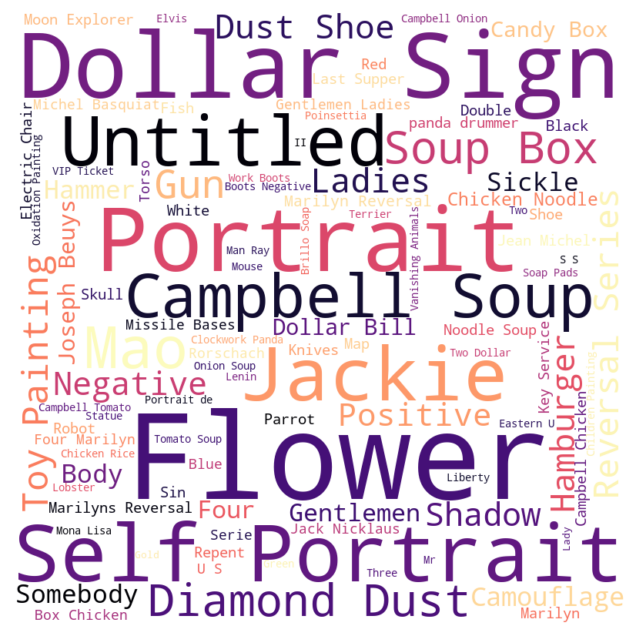

In [5]:
plt.subplots(figsize=(10, 8))
wordcloud = (
    WordCloud(max_words=100, background_color='white', colormap='magma', width=800, height=800)
    .generate(' '.join(warhol['title'].dropna()))
)

plt.imshow(wordcloud, interpolation='bilinear', )
plt.axis('off');

#plt.savefig(fname='warhol_title-wordcloud.png', dpi=150, bbox_inches='tight');

This is helpful to get a sense of how frequently various words (and pairs of words, too) appear in the dataset.

Out of curiosity, let's see if there are noticeable auction price differences (in constant 2022 dollars) for some of these key words.

In [6]:
dollar = warhol[warhol['title'].str.lower().str.contains('dollar sign').fillna(False)]
flower = warhol[warhol['title'].str.lower().str.contains('flower').fillna(False)]
selfportrait = warhol[warhol['title'].str.lower().str.contains('self portrait').fillna(False)]
soup = warhol[warhol['title'].str.lower().str.contains('soup').fillna(False)]
jackie = warhol[warhol['title'].str.lower().str.contains('jackie').fillna(False)]

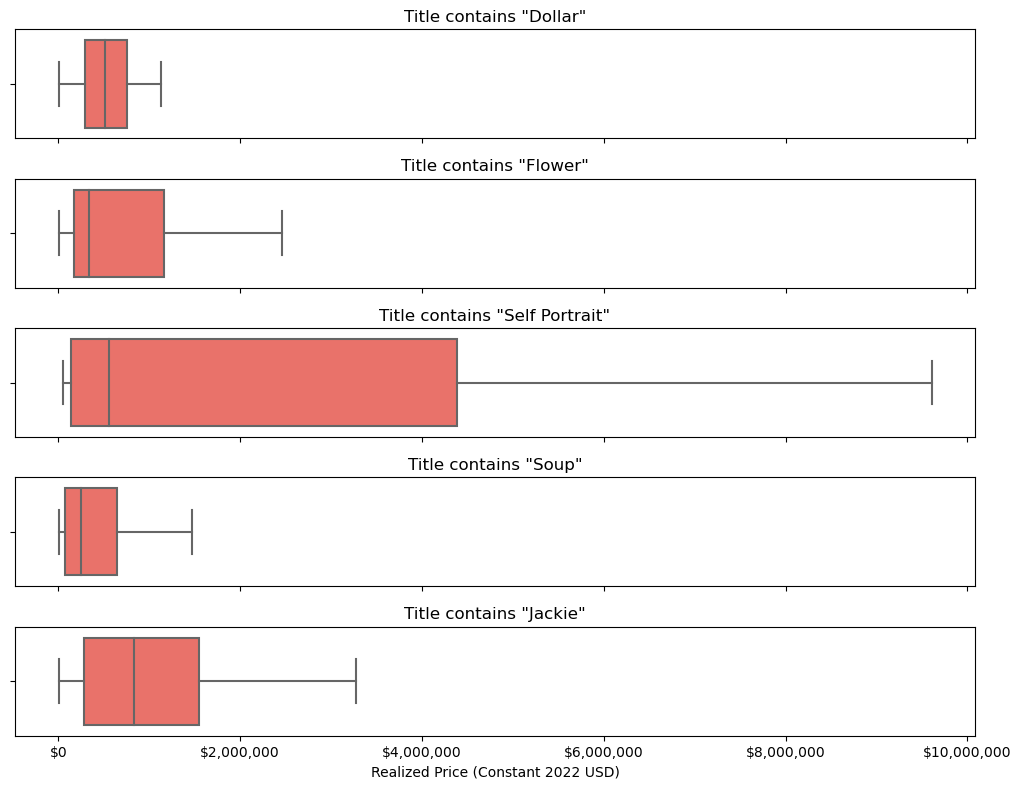

In [7]:
fig, axs = plt.subplots(5, 1, figsize=(10, 8), sharex=True)

# Titles containing "Dollar"
sns.boxplot(
    data=dollar, x='price_realized_USD_constant_2022',
    ax=axs[0], showfliers=False
)
axs[0].set_title('Title contains "Dollar"')
axs[0].set_xlabel('')

# Titles containing "Flower"
sns.boxplot(
    data=flower, x='price_realized_USD_constant_2022',
    ax=axs[1], showfliers=False
)
axs[1].set_title('Title contains "Flower"')
axs[1].set_xlabel('')

# Titles containing "Self Portrait"
sns.boxplot(
    data=selfportrait, x='price_realized_USD_constant_2022',
    ax=axs[2], showfliers=False
)
axs[2].set_title('Title contains "Self Portrait"')
axs[2].set_xlabel('')

# Titles containing "Soup"
sns.boxplot(
    data=soup, x='price_realized_USD_constant_2022',
    ax=axs[3], showfliers=False
)
axs[3].set_title('Title contains "Soup"')
axs[3].set_xlabel('')

# Titles containing "Jackie"
sns.boxplot(
    data=jackie, x='price_realized_USD_constant_2022',
    ax=axs[4], showfliers=False
)
axs[4].set_title('Title contains "Jackie"')
axs[4].set_xlabel('Realized Price (Constant 2022 USD)')


# Set ticks and layout
fig.tight_layout()
axs[3].get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
axs[3].tick_params(axis='x', rotation=-45)

#plt.savefig(fname='warhol_title-keywords-price.png', dpi=150, bbox_inches='tight');

Looks like Jackie O works fetch a higher median price than, for instance, Campbell's Soup works.

I'm also curious to generate a wordcloud for the `medium` feature.

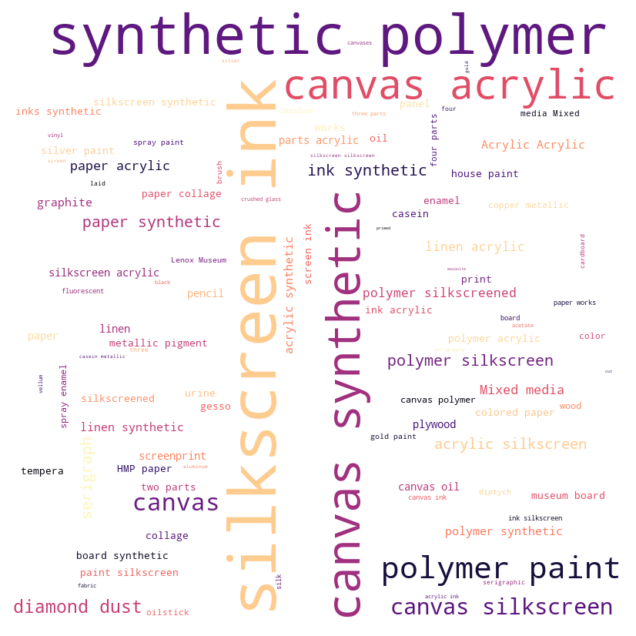

In [8]:
plt.subplots(figsize=(10, 8))

wordcloud = (
    WordCloud(max_words=100, background_color='white', colormap='magma', width=800, height=800)
    .generate(' '.join(warhol['medium'].dropna()))
)

plt.imshow(wordcloud, interpolation='bilinear', )
plt.axis('off');

#plt.savefig(fname='warhol_medium-wordcloud.png', dpi=150, bbox_inches='tight');

For fun, let's look at how realized price varies based on media.

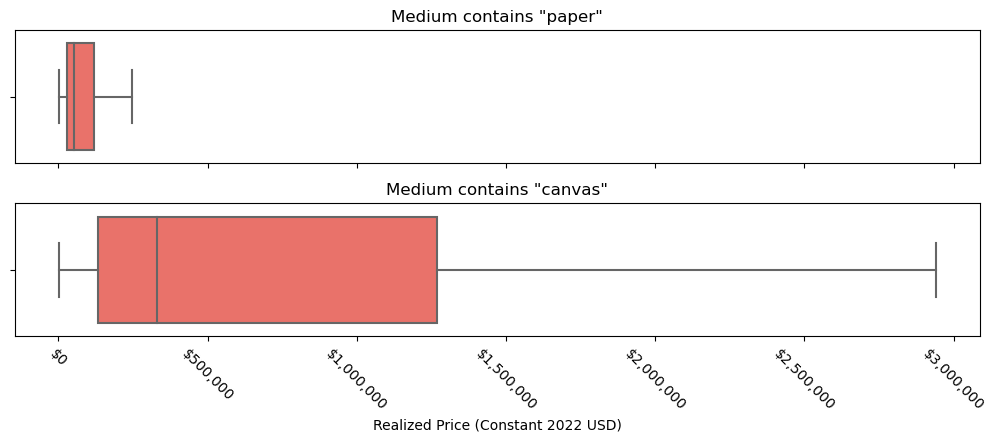

In [9]:
canvas = warhol[warhol['medium'].str.lower().str.contains('canvas').fillna(False)]
paper = warhol[warhol['medium'].str.lower().str.contains('paper').fillna(False)]


fig, axs = plt.subplots(2, 1, figsize=(10, 4), sharex=True)


# Medium contains "paper"
sns.boxplot(
    data=paper, x='price_realized_USD_constant_2022',
    ax=axs[0], showfliers=False
)
axs[0].set_title('Medium contains "paper"')
axs[0].set_xlabel('')

# Medium contains "canvas"
sns.boxplot(
    data=canvas, x='price_realized_USD_constant_2022',
    ax=axs[1], showfliers=False
)
axs[1].set_title('Medium contains "canvas"')
axs[1].set_xlabel('Realized Price (Constant 2022 USD)')


# Set ticks and layout
fig.tight_layout()
axs[1].get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
axs[1].tick_params(axis='x', rotation=-45);

#plt.savefig(fname='warhol_medium-keywords-price.png', dpi=150, bbox_inches='tight');

That's a striking difference and suggests that doing some Natural Language Processing on the `medium` feature could really be beneficial.